In [1]:
import pandas as pd
import gc
import numpy as np

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [3]:
data = pd.read_pickle('../processed/data_with_features2.pkl')

In [4]:
data.shape

(29622473, 132)

In [5]:
data['to_drop'].value_counts()

True     15047590
False    14574883
Name: to_drop, dtype: int64

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29622473 entries, 0 to 29622472
Columns: 132 entries, ID to to_drop
dtypes: datetime64[ns](1), float16(110), int32(2), int64(3), object(4), uint16(1), uint32(1), uint8(10)
memory usage: 8.7+ GB


In [9]:
use_embeddings = False
zeros_mode = False
use_mean_encoding = False

In [10]:
data.shape

(29622473, 132)

# Choosing only columns of interest

In [11]:
to_drop = []
if not use_embeddings:
    to_drop.extend([i for i in data.columns.tolist() if 'vector' in i])

In [12]:
if not use_mean_encoding:
    to_drop.extend([i for i in data.columns.tolist() if 'mean_encoded' in i])

In [13]:
to_drop

['vector_0',
 'vector_1',
 'vector_2',
 'vector_3',
 'vector_4',
 'vector_5',
 'vector_6',
 'vector_7',
 'vector_8',
 'vector_9',
 'vector_10',
 'vector_11',
 'vector_12',
 'vector_13',
 'vector_14',
 'vector_15',
 'vector_16',
 'vector_17',
 'vector_18',
 'vector_19',
 'sales_mean_encoded_by_SKU_train',
 'sales_mean_encoded_by_SKU_val',
 'sales_mean_encoded_by_geoCluster_train',
 'sales_mean_encoded_by_geoCluster_val',
 'sales_mean_encoded_by_geoClusterSKU_train',
 'sales_mean_encoded_by_geoClusterSKU_val']

In [14]:
to_drop.extend(['revanue'])

In [15]:
data = data.drop(columns=to_drop)

In [16]:
data.columns.tolist()

['ID',
 'geoCluster',
 'SKU',
 'date',
 'sales',
 'month',
 'day',
 'weekday',
 'week_num',
 'commodity_group',
 'productCategory_caption_RU',
 'cityId',
 'price',
 'lagerUnitQuantity',
 'lagerUnitTypeId',
 'days_on_the_market',
 'days_on_the_market_geo',
 'year',
 'month_num',
 'revanue_grouped_week_num_commodity_group_mean_lag_2',
 'revanue_grouped_week_num_commodity_group_mean_lag_3',
 'revanue_grouped_week_num_cityId_mean_lag_2',
 'revanue_grouped_week_num_cityId_mean_lag_3',
 'revanue_grouped_week_num_geoCluster_mean_lag_2',
 'revanue_grouped_week_num_geoCluster_mean_lag_3',
 'revanue_grouped_week_num_geoCluster_sum_lag_2',
 'revanue_grouped_week_num_geoCluster_sum_lag_3',
 'sales_grouped_week_num_commodity_group_mean_lag_2',
 'sales_grouped_week_num_commodity_group_mean_lag_3',
 'sales_grouped_week_num_cityId_mean_lag_2',
 'sales_grouped_week_num_cityId_mean_lag_3',
 'sales_grouped_week_num_geoCluster_mean_lag_2',
 'sales_grouped_week_num_geoCluster_mean_lag_3',
 'sales_grouped_w

# Train-test-sub split

In [17]:
train = data[data['split']=='train']
val = data[data['split']=='val']
sub = data[data['split']=='sub']

In [18]:
if not use_mean_encoding:
    del data;
    gc.collect();

In [19]:
if use_mean_encoding:
    to_drop_validation = [i for i in data.columns if 'mean_encoded' in i and 'train' in i]
else:
    to_drop_validation = []

In [20]:
if use_mean_encoding:
    to_drop_train = [i for i in data.columns if 'mean_encoded' in i and 'val' in i]
else:
    to_drop_train = []

In [21]:
if zeros_mode:
    train = train[train['to_drop']==False]

In [22]:
train_X = train.drop(columns=to_drop_validation+['sales','ID','date','week_num','month_num','productCategory_caption_RU','year','split','Unnamed: 0','is_discount','days_on_the_market_geo','days_on_the_market','to_drop'])
train_y = train['sales']

In [23]:
val_X = val.drop(columns=to_drop_validation+['sales','ID','date','week_num','month_num','productCategory_caption_RU','year','split','Unnamed: 0','is_discount','days_on_the_market_geo','days_on_the_market','to_drop'])
val_y = val['sales']

In [24]:
train_X.columns

Index(['geoCluster', 'SKU', 'month', 'day', 'weekday', 'commodity_group',
       'cityId', 'price', 'lagerUnitQuantity', 'lagerUnitTypeId',
       'revanue_grouped_week_num_commodity_group_mean_lag_2',
       'revanue_grouped_week_num_commodity_group_mean_lag_3',
       'revanue_grouped_week_num_cityId_mean_lag_2',
       'revanue_grouped_week_num_cityId_mean_lag_3',
       'revanue_grouped_week_num_geoCluster_mean_lag_2',
       'revanue_grouped_week_num_geoCluster_mean_lag_3',
       'revanue_grouped_week_num_geoCluster_sum_lag_2',
       'revanue_grouped_week_num_geoCluster_sum_lag_3',
       'sales_grouped_week_num_commodity_group_mean_lag_2',
       'sales_grouped_week_num_commodity_group_mean_lag_3',
       'sales_grouped_week_num_cityId_mean_lag_2',
       'sales_grouped_week_num_cityId_mean_lag_3',
       'sales_grouped_week_num_geoCluster_mean_lag_2',
       'sales_grouped_week_num_geoCluster_mean_lag_3',
       'sales_grouped_week_num_geoCluster_sum_lag_2',
       'sales_grou

In [25]:
sub_X = sub.drop(columns=to_drop_train+['sales','ID','date','week_num','month_num','productCategory_caption_RU','year','split','Unnamed: 0','is_discount','days_on_the_market_geo','days_on_the_market','to_drop'])

# Training

### tuning

In [26]:
import lightgbm as lgb

In [27]:
from lightgbm import plot_importance
from skopt import forest_minimize


In [28]:
from time import time

In [29]:
lgb_model = lgb.LGBMRegressor(feature_fraction= 0.9,
               metric = 'mae',
               max_depth = 64, 
               min_data_in_leaf = 2**7, 
               bagging_fraction = 0.75, 
               learning_rate = 0.03, 
               objective = 'mae', 
               bagging_seed = 2**7, 
               num_leaves = 250,
               bagging_freq =1,
               verbose = 1,
            random_state=5,
            n_estimators=150)

lgb_model.fit(train_X,train_y,eval_metric="mae", 
    eval_set=[(val_X, val_y)], 
    verbose=True, 
    early_stopping_rounds = 10)

/home/ubuntu/dsteam/jupyter_env/lib/python3.8/site-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/home/ubuntu/dsteam/jupyter_env/lib/python3.8/site-packages/lightgbm/sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] bagging_fraction is set=0.75, subsample=1.0 will be ignored. Current value: bagging_fraction=0.75
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] min_data_in_leaf is set=128, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=128
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] bagging_fraction is set=0.75, subsample=1.0 will be ignored. Current value: bagging_fraction=0.75
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] min_data_in_leaf is set=128, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=128
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] Auto-choosing row-wise multi-

LGBMRegressor(bagging_fraction=0.75, bagging_freq=1, bagging_seed=128,
              feature_fraction=0.9, learning_rate=0.03, max_depth=64,
              metric='mae', min_data_in_leaf=128, n_estimators=150,
              num_leaves=250, objective='mae', random_state=5, verbose=1)

In [30]:
lgb_model.best_score_['valid_0']['l1']

0.17358543253173458

<AxesSubplot:title={'center':'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

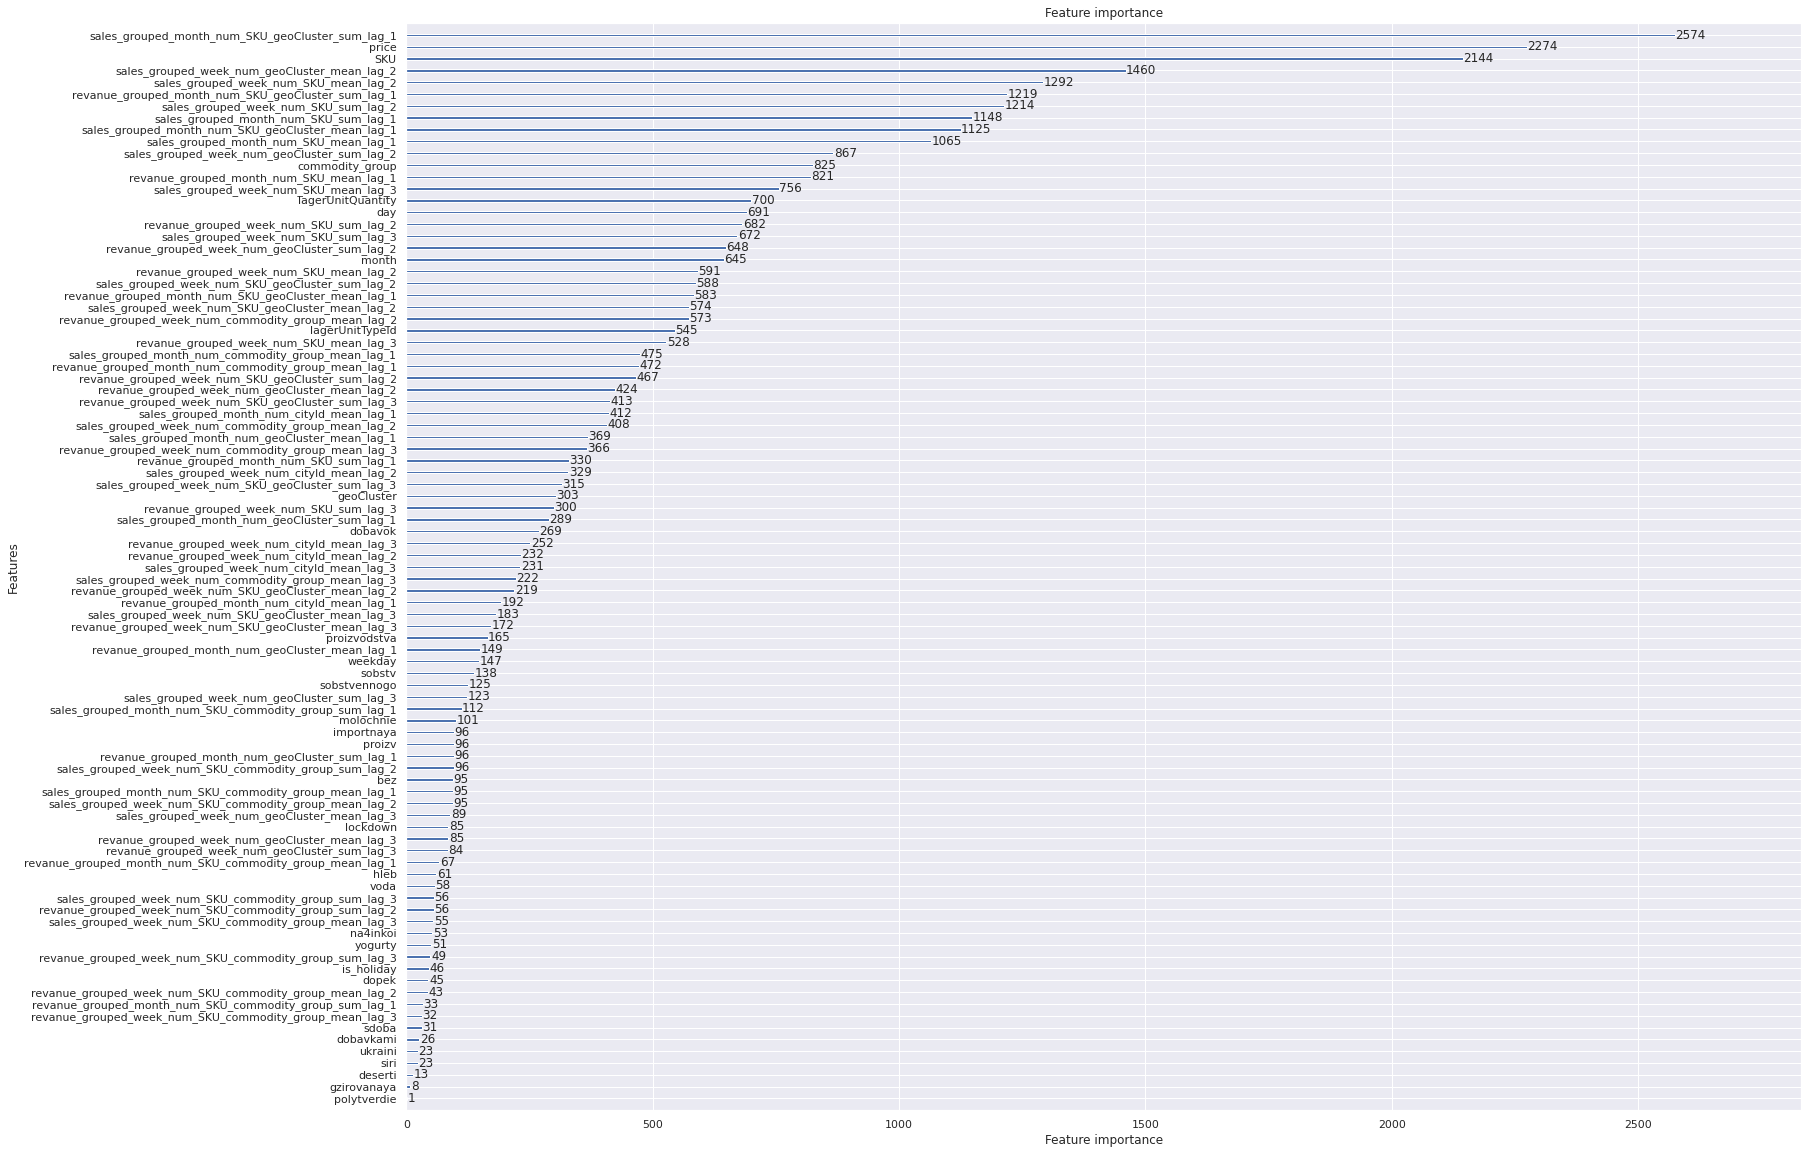

In [31]:
plot_importance(lgb_model,ax=plt.subplots(1,1,figsize=(25,20))[1])

In [32]:
def get_lgbm_varimp(model, train_columns, max_vars=50):
    
    if "basic.Booster" in str(model.__class__):
        # lightgbm.basic.Booster was trained directly, so using feature_importance() function 
        cv_varimp_df = pd.DataFrame([train_columns, model.feature_importance()]).T
    else:
        # Scikit-learn API LGBMClassifier or LGBMRegressor was fitted, 
        # so using feature_importances_ property
        cv_varimp_df = pd.DataFrame([train_columns, model.feature_importances_]).T

    cv_varimp_df.columns = ['feature_name', 'varimp']

    cv_varimp_df.sort_values(by='varimp', ascending=False, inplace=True)

    cv_varimp_df = cv_varimp_df.iloc[0:max_vars]   

    return cv_varimp_df

In [33]:
feature_importance = get_lgbm_varimp(lgb_model, train_X.columns)

In [38]:
features = feature_importance[feature_importance['varimp']>100]['feature_name']

### final train

In [39]:
if zeros_mode:
    val = val[val['to_drop']==False]
    val_X = val.drop(columns=to_drop_validation+['sales','ID','date','week_num','month_num','productCategory_caption_RU','year','split','Unnamed: 0','is_discount','days_on_the_market_geo','days_on_the_market','to_drop'])
    val_y = val['sales']
    full_X = pd.concat([train_X, val_X], axis=0)
    full_y = pd.concat([train_y, val_y], axis=0)
elif use_mean_encoding:
    full_X = data[data['split'].isin(['train','val'])].drop(columns=to_drop_train+['sales','ID','date','week_num','month_num','productCategory_caption_RU','year','split','Unnamed: 0','is_discount','days_on_the_market_geo','days_on_the_market'])
    full_y = data[data['split'].isin(['train','val'])]['sales']
else:
    full_X = pd.concat([train_X, val_X], axis=0)
    full_y = pd.concat([train_y, val_y], axis=0)

In [40]:
features.values

array(['sales_grouped_month_num_SKU_geoCluster_sum_lag_1', 'price', 'SKU',
       'sales_grouped_week_num_geoCluster_mean_lag_2',
       'sales_grouped_week_num_SKU_mean_lag_2',
       'revanue_grouped_month_num_SKU_geoCluster_sum_lag_1',
       'sales_grouped_week_num_SKU_sum_lag_2',
       'sales_grouped_month_num_SKU_sum_lag_1',
       'sales_grouped_month_num_SKU_geoCluster_mean_lag_1',
       'sales_grouped_month_num_SKU_mean_lag_1',
       'sales_grouped_week_num_geoCluster_sum_lag_2', 'commodity_group',
       'revanue_grouped_month_num_SKU_mean_lag_1',
       'sales_grouped_week_num_SKU_mean_lag_3', 'lagerUnitQuantity',
       'day', 'revanue_grouped_week_num_SKU_sum_lag_2',
       'sales_grouped_week_num_SKU_sum_lag_3',
       'revanue_grouped_week_num_geoCluster_sum_lag_2', 'month',
       'revanue_grouped_week_num_SKU_mean_lag_2',
       'sales_grouped_week_num_SKU_geoCluster_sum_lag_2',
       'revanue_grouped_month_num_SKU_geoCluster_mean_lag_1',
       'sales_grouped_week

In [41]:
lgb_model = lgb.LGBMRegressor(feature_fraction= 0.9,
               metric = 'mae',
               max_depth = 64, 
               min_data_in_leaf = 2**7, 
               bagging_fraction = 0.75, 
               learning_rate = 0.03, 
               objective = 'mae', 
               bagging_seed = 2**7, 
               num_leaves = 250,
               bagging_freq =1,
               verbose = 1,
            random_state=5,
            n_estimators=150)

lgb_model.fit(full_X[features.values],full_y,eval_metric="mae", 
    eval_set=[(full_X[features.values], full_y)], 
    verbose=True, 
    early_stopping_rounds = 10)

[LightGBM] [Warning] bagging_fraction is set=0.75, subsample=1.0 will be ignored. Current value: bagging_fraction=0.75
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] min_data_in_leaf is set=128, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=128
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] bagging_fraction is set=0.75, subsample=1.0 will be ignored. Current value: bagging_fraction=0.75
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] min_data_in_leaf is set=128, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=128
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] Auto-choosing row-wise multi-

LGBMRegressor(bagging_fraction=0.75, bagging_freq=1, bagging_seed=128,
              feature_fraction=0.9, learning_rate=0.03, max_depth=64,
              metric='mae', min_data_in_leaf=128, n_estimators=150,
              num_leaves=250, objective='mae', random_state=5, verbose=1)

# Submission

In [43]:
prediction = lgb_model.predict(sub_X[features.values])

In [44]:
np.mean(prediction)

0.042617212082027046

In [45]:
len(prediction)

1666028

In [46]:
sub['sales'] = prediction

In [47]:
sub.loc[sub['sales']<0,'sales']= 0

In [48]:
sub = sub[['ID','sales']]

In [49]:
sub.to_csv('submission_v13.csv',index=False)